<a href="https://colab.research.google.com/github/FelipeGonzalezGarrido/Coding-Dojo/blob/main/Ejercicio%20de%20pr%C3%A1ctica%20de%20trazado%20de%20la%20matriz%20de%20confusi%C3%B3n%C2%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [28]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix 


In [24]:
filename = "/content/drive/MyDrive/Data CodingDojo/cancer.csv"
df = pd.read_csv(filename)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
df["diagnosis"] = df["diagnosis"].replace({"M":0,"B":1})

In [26]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state =42)

# Clasificador de arbol de decision

1. Instanciar modelo

In [29]:
dec_clas = DecisionTreeClassifier()

In [30]:
dec_clas.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

2. Entrenar modelo

In [31]:
dec_clas.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
dec_clas_train_score = dec_clas.score(X_train, y_train)
dec_clas_test_score = dec_clas.score(X_test, y_test)
print(dec_clas_train_score)
print(dec_clas_test_score)

1.0
0.9440559440559441


# Clasificador de bagging

1. Hacer Instancia del modelo

In [33]:
bagclass = BaggingClassifier(random_state = 42)

In [34]:
bagclass.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

2. Entrenar modelo en conjunto de entrenamiento

In [35]:
bagclass.fit(X_train, y_train)

BaggingClassifier(random_state=42)

In [36]:
bagclass_train_score = bagclass.score(X_train, y_train)
bagclass_test_score = bagclass.score(X_test, y_test)
print(bagclass_train_score)
print(bagclass_test_score)

0.9929577464788732
0.9370629370629371


# Clasificador de bosque aleatorio

1. Hacer instancia del modelo

In [37]:
randfor = RandomForestClassifier()

In [38]:
randfor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

2. Entrenar modelo

In [39]:
randfor.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
randfor_train_score = randfor.score(X_train, y_train)
randfor_test_score = randfor.score(X_test, y_test)
print(randfor_train_score)
print(randfor_test_score)

1.0
0.972027972027972


# Aplicacion de matriz de confusion

Clasificador de arbol de decision

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


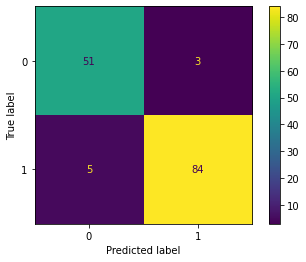

In [43]:
confusion_tree_dec = plot_confusion_matrix(dec_clas, X_test,y_test)

1. ¿Cuál fue la precisión del modelo? (Ya deberían haber determinado esto en el ejercicio de árbol de clasificación)

In [49]:
print("La precision del modelo es del:", ((51+84)/(51+84+3+5))*100,"%")

La precision del modelo es del: 94.4055944055944 %


2. ¿Qué condición (maligno o benigno) se considera la clase positiva en este conjunto de datos?

Maligno es la clase positiva, mientras que benigno la negativa

3. ¿Cuántos falsos positivos había?
Habian 3 falsos positivos


4) ¿Cuántos falsos negativos había?\

Habian 5 Falsos negativos


5) Para el conjunto de datos de cáncer de mama, ¿cuál creen que sea el más problemático: los falsos positivos o los falsos negativos? Expliquen.  
Los falsos negativos ya que es un cancer maligno que no se detecta


# Otras matriz de confusion

Clasificador de Bagging tree

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


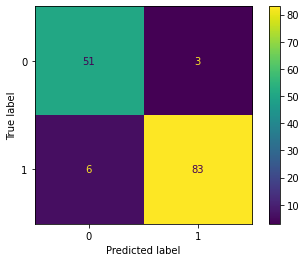

In [46]:
confusion_bagclass = plot_confusion_matrix(bagclass, X_test,y_test)

Clasificador de bosque aleatorio

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


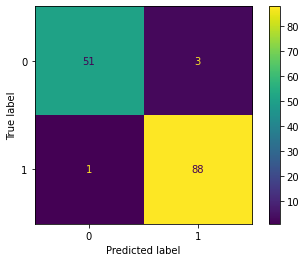

In [47]:
confusion_randfor = plot_confusion_matrix(randfor, X_test,y_test)